# Project: Investigate a Dataset - TMDB 

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I choose the TMDB dataset to do the analysis.
>
> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), like budget, revenue, cast, director and average vote scores ect.
>
> Here is the details of the dataset：https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
>
> I want to find the answer for 2 questions below:
> 
> (1) What kinds of properties are associated with movies that have high revenues?
>
> (2) Which genres are most popular from year to year?


In [1]:
# tmdb_movies.csv cannot be read by UTF-8
# use encoding = 'unicode_escape' to read the dataset

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tmdb_movies.csv', encoding= 'unicode_escape', index_col = 'id')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [125]:
df.head(1)
# There are several unnamed columns in the table

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
id,,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.info()
# These unnamed columns are with few value counts
# There are too many missing values in 'cast', 'homepage', 'tagline', 'keywords' and 'production_companies' to be dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 135397 to 22293
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10835 non-null  object 
 1   popularity            10845 non-null  float64
 2   budget                10845 non-null  int64  
 3   revenue               10845 non-null  int64  
 4   original_title        10845 non-null  object 
 5   cast                  10750 non-null  object 
 6   homepage              2953 non-null   object 
 7   director              10781 non-null  object 
 8   tagline               8035 non-null   object 
 9   keywords              9369 non-null   object 
 10  overview              10841 non-null  object 
 11  runtime               10844 non-null  object 
 12  genres                10815 non-null  object 
 13  production_companies  9831 non-null   object 
 14  release_date          10844 non-null  object 
 15  vote_count    

In [127]:
print(df['Unnamed: 21'].unique())
print(df['Unnamed: 22'].unique())
print(df['Unnamed: 23'].unique())
print(df['Unnamed: 24'].unique())
print(df['Unnamed: 25'].unique())
print(df['Unnamed: 26'].unique())
print(df['Unnamed: 27'].unique())
print(df['Unnamed: 28'].unique())
print(df['Unnamed: 29'].unique())
print(df['Unnamed: 30'].unique())

# These unnamed columns are with useless information and can be dropped

[nan '7.6' '0' '2014' '117' '2009' '2010' '14540970.64' '159125670' '259'
 ' so it kidnaps the inventor and Joanna. Henry and Cody embark to save them and to bring down Kinetech."'
 '7020250.146' 'Hybrid' '113571068.7']
[nan '2015' '0' 'Drama' '7114803.039' '4485768.267' '449076041.5' '7.2'
 '86' '1272921.117' '9/2/2013']
[nan '13799993.93' '0' 'Avenue Picture' '31945805.12' '2013'
 'Adventure|Drama|Family|Science Fiction' '10']
[nan '33919845.96' '6/13/2014' '0' '2.4']
[nan '12' '16273716.75' '4/1/2013' '2013']
[ nan  5.5 16.   0. ]
[   nan 2014.     5.3    0. ]
[  nan    0. 2013.]
[nan  0.]
[nan  0.]


In [128]:
print(df[(df.duplicated())])

# There is one duplicated data to be deleted

         imdb_id  popularity    budget  revenue original_title  \
id                                                               
42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                    cast homepage  \
id                                                                  
42194  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

               director              tagline  \
id                                             
42194  Dwight H. Little  Survival is no game   

                                                keywords  ... Unnamed: 21  \
id                                                        ...               
42194  martial arts|dystopia|based on video game|mart...  ...         NaN   

      Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26 Unnamed: 27  \
id                                                                              
42194         NaN         NaN         NaN         NaN 

**Clean List：**
> (1) Drop the duplicated rows
>
> (2) Drop the columns with many missing values, 'cast', 'homepage', 'tagline', 'keywords' and 'production_companies'
>
> (3) Drop the columns with unnames
>
> (4) Drop the null values in each columns
>
> (5) Make 'vote_count', 'revenue_adj', 'budget_adj', 'runtime' from string to int64
>
> (6) Make 'vote_average' from string to float64

### Data Cleaning 

In [129]:
# Drop the duplicated rows

df.drop_duplicates(inplace = True)
df.shape

(10844, 30)

In [130]:
# Drop the columns with many missing values, 'cast', 'homepage', 'tagline', 'keywords' and 'production_companies'

df = df.drop(['cast', 'homepage', 'tagline', 'keywords', 'production_companies'], axis = 1)
df.shape

(10844, 25)

In [131]:
# Drop the columns with unnames

df = df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'], axis = 1)
df.shape

(10844, 15)

In [132]:
# Drop the null values in each columns
df = df.dropna()
df.shape

(10727, 15)

In [133]:
# make vote_count and vote_average into int and float
df['vote_count'] = df['vote_count'].str.extract('(\d+)')
df['vote_average'] = df['vote_average'].str.extract('(-?\d+\.?\d*)')

df = df.dropna()
df.shape

(10717, 15)

In [134]:
df['vote_count'] = df['vote_count'].astype(np.int64)
df['vote_average'] = df['vote_average'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10717 entries, 135397 to 22293
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10717 non-null  object 
 1   popularity      10717 non-null  float64
 2   budget          10717 non-null  int64  
 3   revenue         10717 non-null  int64  
 4   original_title  10717 non-null  object 
 5   director        10717 non-null  object 
 6   overview        10717 non-null  object 
 7   runtime         10717 non-null  object 
 8   genres          10717 non-null  object 
 9   release_date    10717 non-null  object 
 10  vote_count      10717 non-null  int64  
 11  vote_average    10717 non-null  float64
 12  release_year    10717 non-null  object 
 13  budget_adj      10717 non-null  object 
 14  revenue_adj     10717 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1.3+ MB


In [135]:
# Make budget_adj and revenue_adj into int64
df['budget_adj'] = df['budget_adj'].str.extract('(\d+)').round(0)
df['revenue_adj'] = df['revenue_adj'].str.extract('(\d+)').round(0)

df = df.dropna()
# some rows are string and they would be NaN after transfering into number
# drop all the NaN rows

In [136]:
df['budget_adj'] = df['budget_adj'].astype(np.int64)
df['revenue_adj'] = df['revenue_adj'].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10716 entries, 135397 to 22293
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdb_id         10716 non-null  object 
 1   popularity      10716 non-null  float64
 2   budget          10716 non-null  int64  
 3   revenue         10716 non-null  int64  
 4   original_title  10716 non-null  object 
 5   director        10716 non-null  object 
 6   overview        10716 non-null  object 
 7   runtime         10716 non-null  object 
 8   genres          10716 non-null  object 
 9   release_date    10716 non-null  object 
 10  vote_count      10716 non-null  int64  
 11  vote_average    10716 non-null  float64
 12  release_year    10716 non-null  object 
 13  budget_adj      10716 non-null  int64  
 14  revenue_adj     10716 non-null  int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


In [137]:
# Make runtime int64
df['runtime'] = df['runtime'].str.extract('(\d+)').round(0)
df = df.dropna()

# some rows are string and they would be NaN after transfering into number
# drop all the NaN rows

In [138]:
df['runtime'] = df['runtime'].astype(np.int64)

df['runtime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 10712 entries, 135397 to 22293
Series name: runtime
Non-Null Count  Dtype
--------------  -----
10712 non-null  int64
dtypes: int64(1)
memory usage: 167.4 KB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

In [140]:
df_revenue = df.drop(df[df['revenue'] == 0].index)
df_revenue['revenue'].value_counts()

# Exclude 0 revenue rows to avoid misleading

12000000     10
10000000      8
11000000      6
6000000       6
5000000       6
             ..
408247917     1
93354918      1
76578641      1
171269535     1
33736689      1
Name: revenue, Length: 4679, dtype: int64

<AxesSubplot: xlabel='revenue', ylabel='revenue_adj'>

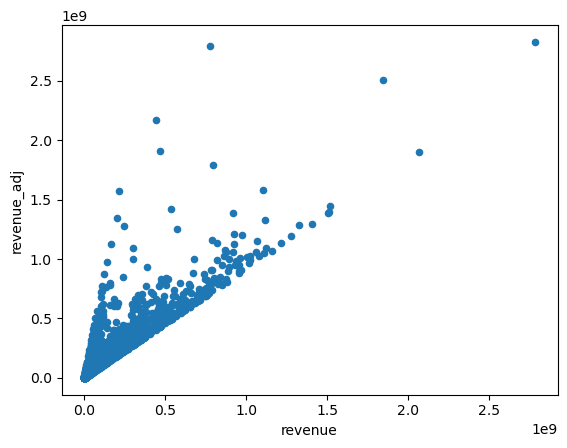

In [141]:
df_revenue.plot(x='revenue', y= 'revenue_adj', kind = 'scatter')

# It is positive correlation between revenue and revenue_adj, and we can see that most revenue_adj is higher than revenue.
# We do not know why there would be a revenue_adj, so we use revenue as our main factor to analysize below.

<AxesSubplot: xlabel='vote_average', ylabel='revenue'>

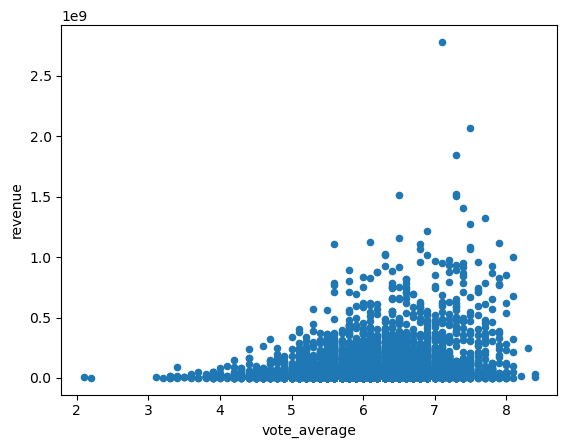

In [142]:
df_revenue.plot(x='vote_average', y= 'revenue', kind = 'scatter')

# Higher vote_average means higher quality but not popularity.
# Higer vote_average would have more chance to get higher revenue, but we can see the movie with highist revenue is not with highist vote_average.
# We can get that audience like movie with vote_average 5-8, but there is no market for the movies with vote_average higher or lower than 5-8.

<AxesSubplot: xlabel='popularity', ylabel='revenue'>

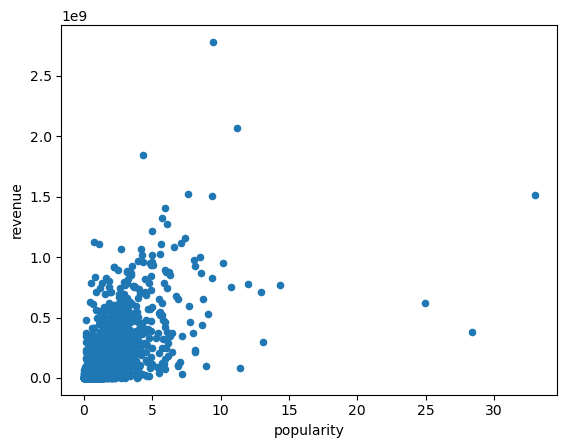

In [143]:
df_revenue.plot(x='popularity', y= 'revenue', kind = 'scatter')

# Movies with over 1.5 billion revenue is with popularity over 5.
# If the popularity is less 5, there is merely to make revenue over 1 billion.

<AxesSubplot: xlabel='runtime', ylabel='revenue'>

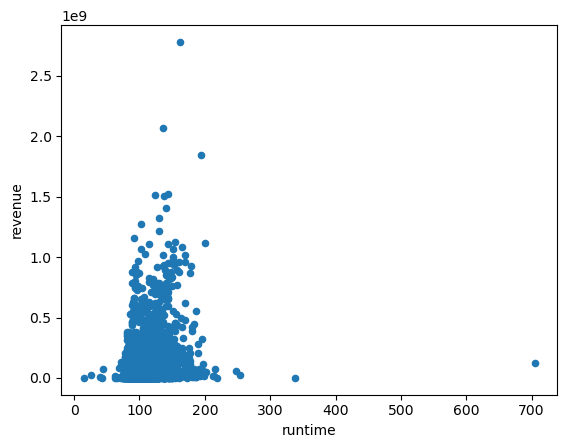

In [144]:
df_revenue.plot(x='runtime', y= 'revenue', kind = 'scatter')

# There is not correlation between runtime and revenue.
# The runtime of most movies is 100-200 and some can get higher revenue.
# Runtime is not the main factor to make higher revenue.

### Research Question 2  (Which genres are most popular from year to year?)

In [145]:
df['genres_1'] = df['genres'].str.split('|').str.get(0)
df['genres_2'] = df['genres'].str.split('|').str.get(1)
df['genres_3'] = df['genres'].str.split('|').str.get(2)
df['genres_4'] = df['genres'].str.split('|').str.get(3)
df['genres_5'] = df['genres'].str.split('|').str.get(4)

df['genres_5'].value_counts()

# Split 'genres' into individual columns

Thriller           119
Science Fiction     66
Family              59
Romance             45
Fantasy             40
Mystery             37
Crime               23
War                 22
Drama               19
Comedy              15
Music               14
Adventure           14
TV Movie            14
Horror              11
Action              10
Western             10
Foreign              9
History              4
Animation            3
Name: genres_5, dtype: int64

In [148]:
genres_1 = df['genres_1'].value_counts()
genres_2 = df['genres_2'].value_counts()
genres_3 = df['genres_3'].value_counts()
genres_4 = df['genres_4'].value_counts()
genres_5 = df['genres_5'].value_counts()
genres = genres_1 + genres_2 + genres_3 + genres_4 + genres_5
genres

# Check the frequency of each genres
# Choose the top 10 of frequency to do further analysis

Action             2353.0
Adventure          1454.0
Animation           687.0
Comedy             3770.0
Crime              1345.0
Documentary           NaN
Drama              4715.0
Family             1217.0
Fantasy             904.0
Foreign             179.0
History             323.0
Horror             1623.0
Music               398.0
Mystery             803.0
Romance            1696.0
Science Fiction    1206.0
TV Movie            162.0
Thriller           2881.0
War                 264.0
Western             164.0
dtype: float64

In [150]:
df['Drama'] = (df['genres_1'] == 'Drama') | (df['genres_2'] == 'Drama') | (df['genres_3'] == 'Drama') | (df['genres_4'] == 'Drama') | (df['genres_5'] == 'Drama')
df['Comedy'] = (df['genres_1'] == 'Comedy') | (df['genres_2'] == 'Comedy') | (df['genres_3'] == 'Comedy') | (df['genres_4'] == 'Comedy') | (df['genres_5'] == 'Comedy')
df['Thriller'] = (df['genres_1'] == 'Thriller') | (df['genres_2'] == 'Thriller') | (df['genres_3'] == 'Thriller') | (df['genres_4'] == 'Thriller') | (df['genres_5'] == 'Thriller')
df['Action'] = (df['genres_1'] == 'Action') | (df['genres_2'] == 'Action') | (df['genres_3'] == 'Action') | (df['genres_4'] == 'Action') | (df['genres_5'] == 'Action')
df['Romance'] = (df['genres_1'] == 'Romance') | (df['genres_2'] == 'Romance') | (df['genres_3'] == 'Romance') | (df['genres_4'] == 'Romance') | (df['genres_5'] == 'Romance')
df['Horror'] = (df['genres_1'] == 'Horror') | (df['genres_2'] == 'Horror') | (df['genres_3'] == 'Horror') | (df['genres_4'] == 'Horror') | (df['genres_5'] == 'Horror')
df['Adventure'] = (df['genres_1'] == 'Adventure') | (df['genres_2'] == 'Adventure') | (df['genres_3'] == 'Adventure') | (df['genres_4'] == 'Adventure') | (df['genres_5'] == 'Adventure')
df['Crime'] = (df['genres_1'] == 'Crime') | (df['genres_2'] == 'Crime') | (df['genres_3'] == 'Crime') | (df['genres_4'] == 'Crime') | (df['genres_5'] == 'Crime')
df['Family'] = (df['genres_1'] == 'Family') | (df['genres_2'] == 'Family') | (df['genres_3'] == 'Family') | (df['genres_4'] == 'Family') | (df['genres_5'] == 'Family')
df['Science Fiction'] = (df['genres_1'] == 'Science Fiction') | (df['genres_2'] == 'Science Fiction') | (df['genres_3'] == 'Science Fiction') | (df['genres_4'] == 'Science Fiction') | (df['genres_5'] == 'Science Fiction')

# Give a mark for each genres

In [151]:
# Calculate the mean of popularity by genres and release_year
# Merge all the tables in the end

df_drama = df[df['Drama'] == True]
Drama_Year_mean = df_drama.groupby(['release_year'], as_index = False)['popularity'].mean()

In [152]:
df_comedy = df[df['Comedy'] == True]
Comedy_Year_mean = df_comedy.groupby(['release_year'], as_index = False)['popularity'].mean()

In [153]:
df_combined = Drama_Year_mean.merge(Comedy_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)

,release_year,popularity_x,popularity_y
0,1960,0.566305,0.396000
1,1961,0.432233,0.679838
2,1962,0.370411,0.273183
3,1963,0.322448,0.444481
4,1964,0.364819,0.491229


In [154]:
df_Thriller = df[df['Thriller'] == True]
Thriller_Year_mean = df_Thriller.groupby(['release_year'], as_index = False)['popularity'].mean()

In [155]:
df_combined = df_combined.merge(Thriller_Year_mean, left_on='release_year', right_on='release_year', how='inner', suffixes=('_drama', '_comedy', '_thriller'))
df_combined.head(1)

,release_year,popularity_x,popularity_y,popularity
0,1960,0.566305,0.396000,0.811910
1,1962,0.370411,0.273183,0.760582
2,1963,0.322448,0.444481,0.719929
3,1964,0.364819,0.491229,0.622580
4,1965,0.305288,0.358721,0.343072


In [156]:
df_Action = df[df['Action'] == True]
Action_Year_mean = df_Action.groupby(['release_year'], as_index = False)['popularity'].mean()

In [157]:
df_combined = df_combined.merge(Action_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)

C:\Users\urrig\AppData\Local\Temp\ipykernel_10296\152240323.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'popularity_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_combined = df_combined.merge(Action_Year_mean, left_on='release_year', right_on='release_year', how='inner')


,release_year,popularity_x,popularity_y,popularity_x,popularity_y
0,1960,0.566305,0.396000,0.811910,0.590724
1,1962,0.370411,0.273183,0.760582,0.708945
2,1963,0.322448,0.444481,0.719929,0.951729
3,1964,0.364819,0.491229,0.622580,0.813087
4,1965,0.305288,0.358721,0.343072,0.451373


In [158]:
df_Romance = df[df['Romance'] == True]
Romance_Year_mean = df_Romance.groupby(['release_year'], as_index = False)['popularity'].mean()

In [159]:
df_combined = df_combined.merge(Romance_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)

,release_year,popularity_x,popularity_y,popularity_x,popularity_y,popularity
0,1960,0.566305,0.396000,0.811910,0.590724,0.541227
1,1962,0.370411,0.273183,0.760582,0.708945,0.251082
2,1963,0.322448,0.444481,0.719929,0.951729,0.399573
3,1964,0.364819,0.491229,0.622580,0.813087,0.221586
4,1965,0.305288,0.358721,0.343072,0.451373,0.622780


In [160]:
df_Horror = df[df['Horror'] == True]
Horror_Year_mean = df_Horror.groupby(['release_year'], as_index = False)['popularity'].mean()

In [161]:
df_combined = df_combined.merge(Horror_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)

C:\Users\urrig\AppData\Local\Temp\ipykernel_10296\126239702.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'popularity_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_combined = df_combined.merge(Horror_Year_mean, left_on='release_year', right_on='release_year', how='inner')


,release_year,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y
0,1960,0.566305,0.396000,0.811910,0.590724,0.541227,0.591450
1,1962,0.370411,0.273183,0.760582,0.708945,0.251082,0.179368
2,1963,0.322448,0.444481,0.719929,0.951729,0.399573,0.376901
3,1964,0.364819,0.491229,0.622580,0.813087,0.221586,0.189650
4,1965,0.305288,0.358721,0.343072,0.451373,0.622780,0.124838


In [162]:
df_Adventure = df[df['Adventure'] == True]
Adventure_Year_mean = df_Adventure.groupby(['release_year'], as_index = False)['popularity'].mean()

In [163]:
df_combined = df_combined.merge(Adventure_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)

,release_year,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y,popularity
0,1960,0.566305,0.396000,0.811910,0.590724,0.541227,0.591450,0.700981
1,1962,0.370411,0.273183,0.760582,0.708945,0.251082,0.179368,0.942513
2,1963,0.322448,0.444481,0.719929,0.951729,0.399573,0.376901,0.728487
3,1964,0.364819,0.491229,0.622580,0.813087,0.221586,0.189650,0.736431
4,1965,0.305288,0.358721,0.343072,0.451373,0.622780,0.124838,0.581820


In [164]:
df_Crime = df[df['Crime'] == True]
Crime_Year_mean = df_Crime.groupby(['release_year'], as_index = False)['popularity'].mean()

In [165]:
df_combined = df_combined.merge(Crime_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)

C:\Users\urrig\AppData\Local\Temp\ipykernel_10296\836931574.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'popularity_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_combined = df_combined.merge(Crime_Year_mean, left_on='release_year', right_on='release_year', how='inner')


,release_year,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y
0,1960,0.566305,0.396000,0.811910,0.590724,0.541227,0.591450,0.700981,0.346479
1,1962,0.370411,0.273183,0.760582,0.708945,0.251082,0.179368,0.942513,0.472816
2,1963,0.322448,0.444481,0.719929,0.951729,0.399573,0.376901,0.728487,0.552368
3,1964,0.364819,0.491229,0.622580,0.813087,0.221586,0.189650,0.736431,0.261690
4,1965,0.305288,0.358721,0.343072,0.451373,0.622780,0.124838,0.581820,0.387277


In [166]:
df_Family = df[df['Family'] == True]
Family_Year_mean = df_Family.groupby(['release_year'], as_index = False)['popularity'].mean()

In [167]:
df_combined = df_combined.merge(Family_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)

,release_year,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y,popularity
0,1960,0.566305,0.396000,0.811910,0.590724,0.541227,0.591450,0.700981,0.346479,0.278064
1,1962,0.370411,0.273183,0.760582,0.708945,0.251082,0.179368,0.942513,0.472816,0.323463
2,1963,0.322448,0.444481,0.719929,0.951729,0.399573,0.376901,0.728487,0.552368,0.852632
3,1964,0.364819,0.491229,0.622580,0.813087,0.221586,0.189650,0.736431,0.261690,0.878298
4,1965,0.305288,0.358721,0.343072,0.451373,0.622780,0.124838,0.581820,0.387277,0.662713


In [168]:
df_Science_Fiction = df[df['Science Fiction'] == True]
Science_Fiction_Year_mean = df_Science_Fiction.groupby(['release_year'], as_index = False)['popularity'].mean()

In [169]:
df_combined = df_combined.merge(Science_Fiction_Year_mean, left_on='release_year', right_on='release_year', how='inner')
df_combined.head(1)


C:\Users\urrig\AppData\Local\Temp\ipykernel_10296\2591212.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'popularity_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_combined = df_combined.merge(Science_Fiction_Year_mean, left_on='release_year', right_on='release_year', how='inner')


,release_year,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y,popularity_x,popularity_y
0,1960,0.566305,0.396000,0.811910,0.590724,0.541227,0.591450,0.700981,0.346479,0.278064,0.327905
1,1962,0.370411,0.273183,0.760582,0.708945,0.251082,0.179368,0.942513,0.472816,0.323463,0.179212
2,1963,0.322448,0.444481,0.719929,0.951729,0.399573,0.376901,0.728487,0.552368,0.852632,0.467835
3,1964,0.364819,0.491229,0.622580,0.813087,0.221586,0.189650,0.736431,0.261690,0.878298,0.226636
4,1965,0.305288,0.358721,0.343072,0.451373,0.622780,0.124838,0.581820,0.387277,0.662713,0.101956


In [170]:
df_combined.columns = ['release_year', 'popularity_Drama', 'popularity_Comedy', 'popularity_Thriller', 'popularity_Action', 'popularity_Romance', 'popularity_Horror', 'popularity_Adventure', 'popularity_Crime', 'popularity_Family', 'popularity_Science_Fiction']

In [171]:
df_combined.head(1)

,release_year,popularity_Drama,popularity_Comedy,popularity_Thriller,popularity_Action,popularity_Romance,popularity_Horror,popularity_Adventure,popularity_Crime,popularity_Family,popularity_Science_Fiction
0,1960,0.566305,0.396000,0.811910,0.590724,0.541227,0.591450,0.700981,0.346479,0.278064,0.327905
1,1962,0.370411,0.273183,0.760582,0.708945,0.251082,0.179368,0.942513,0.472816,0.323463,0.179212
2,1963,0.322448,0.444481,0.719929,0.951729,0.399573,0.376901,0.728487,0.552368,0.852632,0.467835
3,1964,0.364819,0.491229,0.622580,0.813087,0.221586,0.189650,0.736431,0.261690,0.878298,0.226636
4,1965,0.305288,0.358721,0.343072,0.451373,0.622780,0.124838,0.581820,0.387277,0.662713,0.101956


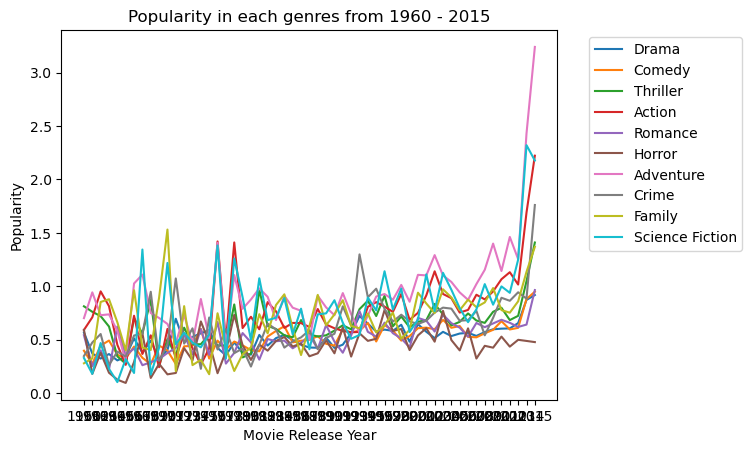

In [172]:
plt.plot(df_combined['release_year'], df_combined['popularity_Drama'], label = 'Drama')
plt.plot(df_combined['release_year'], df_combined['popularity_Comedy'], label = 'Comedy')
plt.plot(df_combined['release_year'], df_combined['popularity_Thriller'], label = 'Thriller')
plt.plot(df_combined['release_year'], df_combined['popularity_Action'], label = 'Action')
plt.plot(df_combined['release_year'], df_combined['popularity_Romance'], label = 'Romance')
plt.plot(df_combined['release_year'], df_combined['popularity_Horror'], label = 'Horror')
plt.plot(df_combined['release_year'], df_combined['popularity_Adventure'], label = 'Adventure')
plt.plot(df_combined['release_year'], df_combined['popularity_Crime'], label = 'Crime')
plt.plot(df_combined['release_year'], df_combined['popularity_Family'], label = 'Family')
plt.plot(df_combined['release_year'], df_combined['popularity_Science_Fiction'], label = 'Science Fiction')

plt.title('Popularity in each genres from 1960 - 2015')
plt.xlabel("Movie Release Year")
plt.ylabel("Popularity")
plt.legend(bbox_to_anchor=(1.05, 1))

# We could see the most popular genres changes year by year
# Horror never be the most popular genres
# Adventure and Science Fiction are popular in many years

<a id='conclusions'></a>
## Conclusions


# Question 1 (What kinds of properties are associated with movies that have high revenues?)

> Higer vote_average would have more chance to get higher revenue, but we can see the movie with highist revenue is not with highist vote_average.
>
> We can get that audience like movie with vote_average 5-8, but there is no market for the movies with vote_average higher or lower than 5-8.
>
> Movies with over 1.5 billion revenue is with popularity over 5.
>
> If the popularity is less 5, there is merely to make revenue over 1 billion.
>
> Runtime is not the main factor to make higher revenue

# Question 2 (Which genres are most popular from year to year?)

> The most popular genres changes year by year
>
> Horror never be the most popular genres
>
> Adventure and Science Fiction are the most popular in many years